In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
#import csv
crypto_df = pd.read_csv('crypto_data.csv',index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#select only trading cryptos
trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]
trading_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
#drop IsTrading column
df_final = trading_df.drop(columns='IsTrading')

In [5]:
#check null values
df_final.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
#drop all null values
df_final = df_final.dropna()

In [7]:
df_final.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
#select only coins that are mined (coins>0)
df_final = df_final.loc[df_final['TotalCoinsMined'] > 0]

In [9]:
df_final

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
#drop CoinName column
df_final1=df_final.drop(columns='CoinName')

In [11]:
df_final1

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [12]:
df_final1['Algorithm'].nunique()

71

In [13]:
df_final1['ProofType'].nunique()

25

In [14]:
df_final1.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [15]:
#convert TotalCoinSupply column to numeric
df_final1["TotalCoinSupply"] = pd.to_numeric(df_final1["TotalCoinSupply"])

In [16]:
df_final1.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [17]:
#convert 'Algorithm','ProofType' columns to numeric using get_dummies function
df_final2 = pd.get_dummies(df_final1, prefix='', prefix_sep='',columns=['Algorithm','ProofType'])

In [18]:
print(df_final1.shape)
print(df_final2.shape)

(532, 4)
(532, 98)


# Scaling the data

In [19]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final2)

df_scaled = pd.DataFrame(scaled_data, columns=df_final2.columns)
df_scaled.shape

(532, 98)

# PCA model

In [20]:
# Initialize PCA model with 90% preserving the explained variance
pca = PCA(n_components=0.90)

# Get all PCs for the data
pca_data = pca.fit_transform(df_scaled)

# Fetch the explained variances for each PC
pc_vars = pca.explained_variance_
pca_data.shape

(532, 74)

# t-SNE model

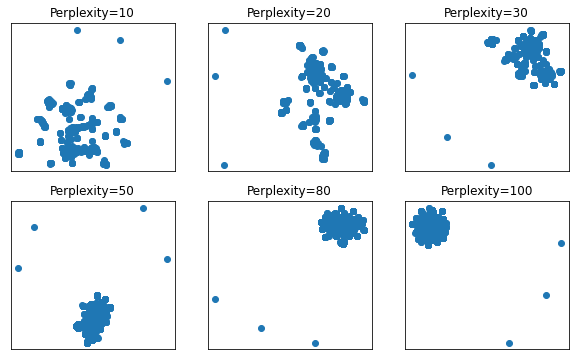

(532, 2)

In [53]:
# Run t-SNE for different values of perplexity with 2 dimensions of embedded space
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(pca_data)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()
tsne_features.shape

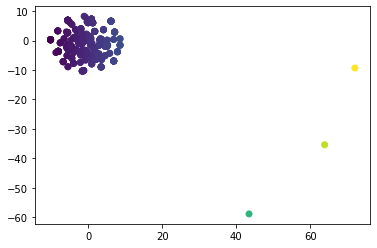

In [54]:
#plot the data
df_final2['x'] = tsne_features[:,0]
df_final2['y'] = tsne_features[:,1]
plt.scatter(df_final2['x'], df_final2['y'], c=tsne_features[:,0])
plt.show()

# K-Means Algorithm

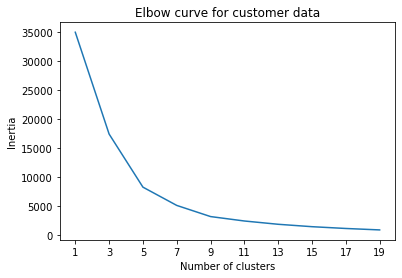

In [29]:
#k-means using tsne_features
inertia = []
k_list = list(range(1, 20,2))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

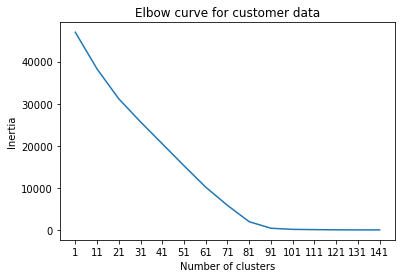

In [25]:
#k-means using pca
inertia = []
k_list = list(range(1, 150,10))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [56]:
#make prediction
model = KMeans(n_clusters=5, random_state=0)
model.fit(tsne_features)
predictions = model.predict(tsne_features)
predictions

array([0, 0, 0, 1, 2, 4, 2, 1, 2, 4, 0, 1, 1, 1, 4, 2, 2, 4, 0, 0, 1, 4,
       1, 4, 4, 0, 1, 0, 4, 0, 4, 0, 4, 2, 2, 0, 1, 1, 4, 4, 4, 4, 4, 0,
       4, 2, 4, 4, 4, 0, 2, 4, 2, 1, 4, 4, 4, 0, 4, 4, 4, 4, 1, 4, 0, 4,
       1, 4, 0, 2, 0, 0, 0, 4, 4, 4, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0,
       0, 4, 4, 1, 4, 2, 1, 1, 0, 0, 1, 1, 2, 4, 4, 1, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 4, 2, 1, 0, 4, 0, 4, 2, 4, 1, 4, 2, 0, 2, 0, 1, 0,
       2, 2, 4, 4, 4, 2, 0, 1, 1, 2, 2, 1, 2, 4, 4, 1, 2, 4, 1, 1, 4, 0,
       4, 2, 0, 4, 4, 2, 4, 1, 2, 4, 4, 2, 2, 1, 1, 4, 2, 4, 4, 0, 0, 0,
       0, 2, 2, 4, 2, 0, 1, 1, 1, 2, 0, 1, 0, 4, 4, 1, 3, 4, 2, 4, 0, 2,
       4, 4, 0, 0, 4, 2, 2, 4, 0, 2, 4, 2, 0, 2, 4, 0, 0, 2, 4, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 4, 0, 0, 1, 0, 4, 1, 0, 0, 1, 2, 0, 2, 0, 1, 4,
       4, 4, 0, 2, 4, 0, 4, 0, 4, 4, 2, 0, 2, 4, 4, 2, 4, 4, 2, 0, 0, 0,
       1, 2, 4, 4, 1, 4, 0, 2, 1, 4, 4, 1, 3, 4, 1, 4, 1, 4, 2, 4, 2, 4,
       0, 4, 2, 2, 0, 1, 0, 1, 4, 4, 4, 2, 2, 1, 2,

# Conclusion

### The dimensionality reduction technique PCA revealed that 74 features are required to get the model accuracy of 90%. Using k-means algorithm with PCA shows around 91 clusters are required before the elbow curve flattens out. However, after further reducing dimensionality using t-SNE, the number of features reduced to 2. Applying the t-SNE results to k-means model, the elbow curve shows the model can perform reasonably well with 5 clusters.